<a href="https://colab.research.google.com/github/aaaksenova/term_paper2021/blob/change/Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer

In [13]:
! pip install transformers
! pip3 install --upgrade pip
! pip3 install sentencepiece
! pip install conllu

     |████████████████████████████████| 2.3MB 29.3MB/s 
     |████████████████████████████████| 901kB 40.6MB/s 
     |████████████████████████████████| 3.3MB 40.3MB/s 
     |████████████████████████████████| 1.6MB 27.1MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 1.2 MB 30.8 MB/s 


In [14]:
import pandas as pd
import numpy as np
import torch
import transformers
from tqdm.auto import tqdm

In [ ]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

change_df = pd.read_csv('change_df.csv')
change_df.drop_duplicates('sentence', inplace=True)
change_df.drop(['id', 'Unnamed: 0'], inplace=True, axis=1)
device = 'cuda'
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-ru-sv")
model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-ru-sv").to(device)

def translate(text):
    try:
        tokenized_text = tokenizer.__call__([text], return_tensors='pt').to(device)
        translation = model.generate(**tokenized_text)
        translated_text = tokenizer.batch_decode(translation, skip_special_tokens=True)[0]       
    except Exception as e:
        print(e)
        translated_text = ' '
    return translated_text


swedish_sentence_1 = [translate(x) for x in tqdm(change_df['sentence'].loc[1765:8000].to_list())]

Token indices sequence length is longer than the specified maximum sequence length for this model (941 > 512). Running this sequence through the model will result in indexing errors


Выходные данные были обрезаны до нескольких последних строк (5000).
CUDA error: device-side assert triggered
CUDA error: device-side assert triggered
CUDA error: device-side assert triggered
CUDA error: device-side assert triggered
CUDA error: device-side assert triggered
CUDA error: device-side assert triggered
CUDA error: device-side assert triggered
CUDA error: device-side assert triggered
CUDA error: device-side assert triggered
CUDA error: device-side assert triggered
CUDA error: device-side assert triggered
CUDA error: device-side assert triggered
CUDA error: device-side assert triggered
CUDA error: device-side assert triggered
CUDA error: device-side assert triggered
CUDA error: device-side assert triggered
CUDA error: device-side assert triggered
CUDA error: device-side assert triggered
CUDA error: device-side assert triggered
CUDA error: device-side assert triggered
CUDA error: device-side assert triggered
CUDA error: device-side assert triggered
CUDA error: device-side assert

In [ ]:
change_df = pd.read_csv('change_translated.csv')

In [ ]:
! pip install sentence_transformers

     |████████████████████████████████| 81 kB 5.8 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-1.1.1-py3-none-any.whl size=123336 sha256=9e28e4d49024d8ea864647b5fc113ada75f719c66d8bf27589e2c96f0be823ad
  Stored in directory: /root/.cache/pip/wheels/9d/f2/81/9a97074f4974b3ade9fee286b3ea9acba88e7c9282928ba187
Successfully built sentence-transformers


## LaBSE vectorization

In [ ]:
from sentence_transformers import SentenceTransformer

device = 'cuda'
model = SentenceTransformer('LaBSE').to(device)

In [ ]:
embeddings = []
tags = []

for line, tag in tqdm(zip(change_df['swedish_sentence'], change_df['field']), total=change_df.shape[0]):
    try: 
        embedding = model.encode(line)
        embeddings.append(embedding)
        tags.append(tag)
    except Exception as e:
        print(line)
        print(e)

100%|██████████| 19553/19553 [04:03<00:00, 80.46it/s]


In [ ]:
! pip uninstall umap
! pip install umap-learn

     |████████████████████████████████| 80 kB 3.6 MB/s 
     |████████████████████████████████| 1.1 MB 8.5 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76566 sha256=d48c650414075116e678d75f7623ee1d506ba7af4376f5d29c548239f0c25407
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.2-py3-none-any.whl size=51347 sha256=09119478704b8f9703ef1ea1c5ff0badb40cf6ff0dcba0a5f128bdb73c7a634d
  Stored in directory: /root/.cache/pip/wheels/62/0b/55/40d651c5a4106ea9ce68d014335a1c7bf059530722c0107b15
Successfully built umap-learn pynndescent


In [ ]:
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap

reducer = umap.UMAP()
Y = reducer.fit_transform(StandardScaler().fit_transform(embeddings))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


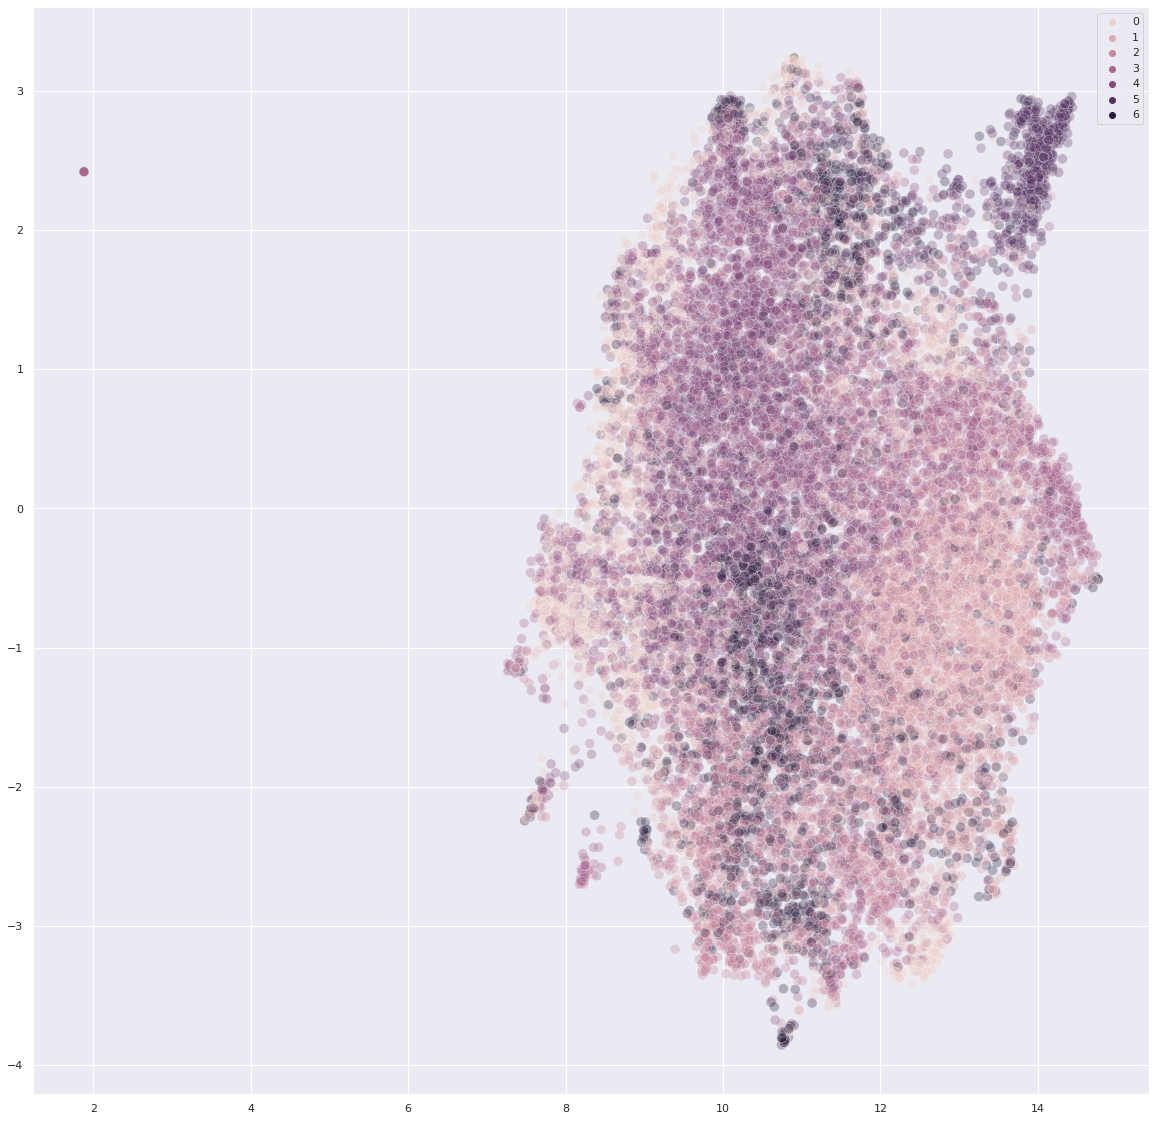

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(20, 20)})
sns.scatterplot(Y[:, 0], Y[:, 1], s=100, alpha=.3, hue=labels)

## LaBSE vectorisation

In [ ]:
df = pd.read_csv('change_verbs.csv')

In [ ]:
from sentence_transformers import SentenceTransformer

device = 'cuda'
model = SentenceTransformer('LaBSE').to(device)

In [ ]:
df["lemma_verb"].replace({'менять' : 'menjatʹ', 'изменять' : 'izmenjatʹ', 'сменять' : 'smenjatʹ', 'заменять' : 'zamenjatʹ'}, inplace=True)

In [ ]:
embeddings_sw = []
tags_sw = []

for line, tag in tqdm(zip(df['swedish_sentence'], df['swedish_verbs']),
                      total=df.shape[0]):
    if tag in ['ändra', 'byta', 'ersätta', 'förändra']:
        try: 
            embedding = model.encode(line)
            embeddings_sw.append(embedding)
            tags_sw.append(tag)
        except Exception as e:
            print(line)
            print(e)

In [ ]:
embeddings_ru = []
tags_ru = []

for line, tag in tqdm(zip(df['sentence'], df['lemma_verb']), total=df.shape[0]):
    if tag in ['menjatʹ', 'izmenjatʹ', 'smenjatʹ', 'zamenjatʹ']:
        try: 
            embedding = model.encode(line)
            embeddings_ru.append(embedding)
            tags_ru.append(tag)
        except Exception as e:
            print(line)
            print(e)

In [ ]:
import h5py


# Save the vectors
hf = h5py.File('data_full.h5', 'w')
hf.create_dataset('dataset_1', data=np.array(embeddings_ru))
hf.create_dataset('dataset_2', data=np.array(embeddings_sw))
hf.close()

In [ ]:
hf = h5py.File('data_full.h5', 'r')
embeddings_ru = list(hf.get('dataset_1'))
embeddings_sw = list(hf.get('dataset_2'))

## Visualisation of joined space

In [ ]:
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap

reducer = umap.UMAP()
sw = reducer.fit_transform(StandardScaler().fit_transform(embeddings_sw))
ru = reducer.fit_transform(StandardScaler().fit_transform(embeddings_ru))

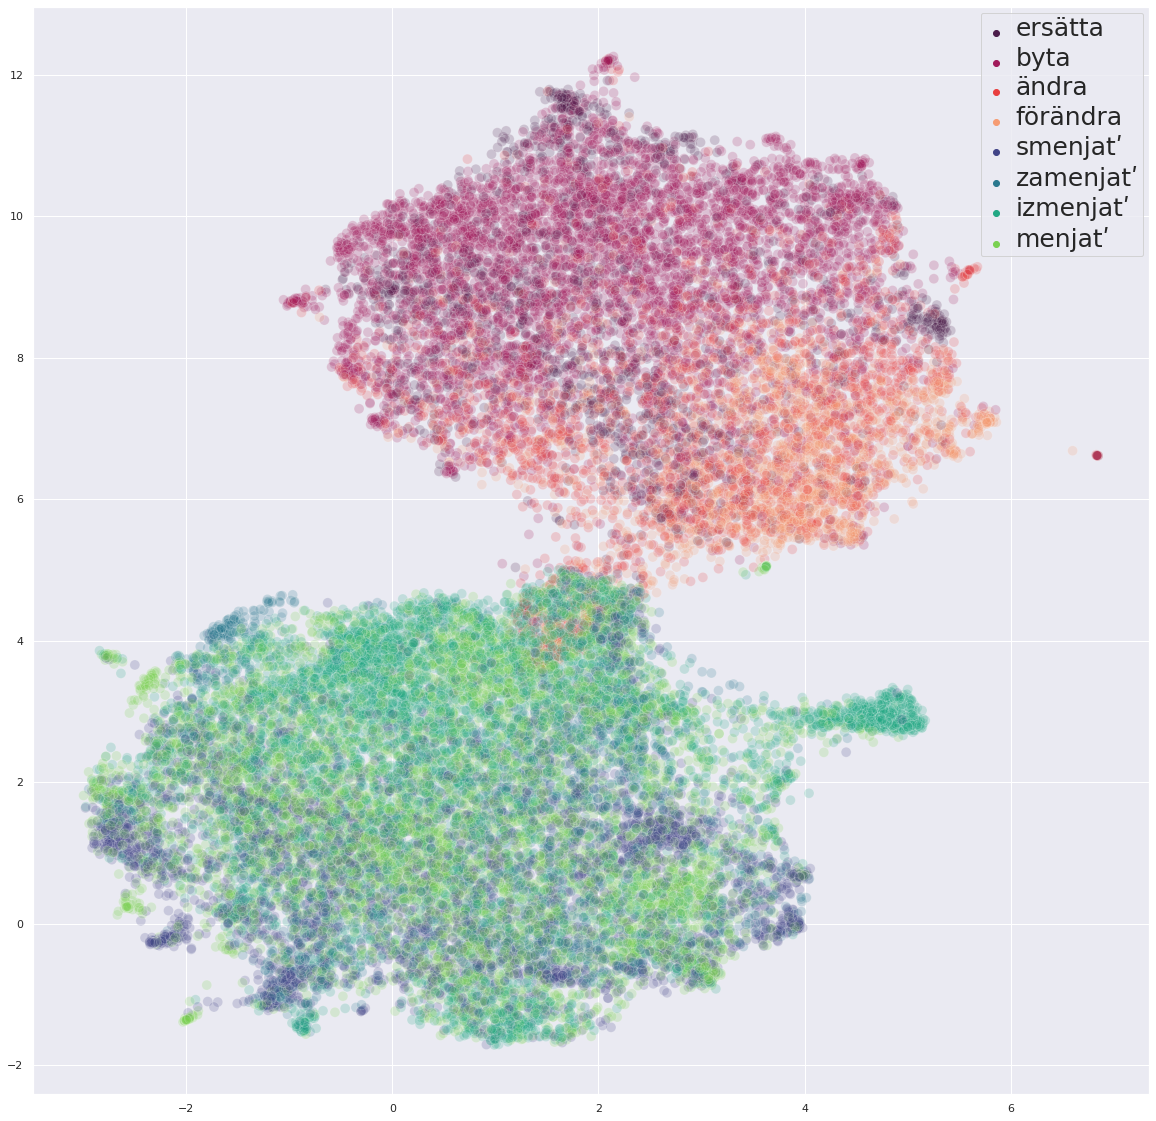

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(20, 20)})
graph_sw = sns.scatterplot(x=sw[:, 0], y=sw[:, 1], s=100, alpha=.2, hue=tags_sw, palette="rocket")
graph_ru = sns.scatterplot(x=ru[:, 0], y=ru[:, 1], s=100, alpha=.2, hue=tags_ru, palette="viridis")
plt.setp(graph_sw.get_legend().get_texts(), fontsize='25')
plt.setp(graph_ru.get_legend().get_texts(), fontsize='25')
plt.show()

## Clustering

### Questionnarie preprocessing

In [ ]:
with open('quest_ru.txt') as fh:
    quest_ru = fh.readlines()

In [ ]:
with open('quest_eng.txt') as fh:
    quest_en = fh.readlines()

In [ ]:
from transformers import pipeline
from tqdm.auto import tqdm
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

device = 'cuda'
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-ru-sv")
model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-ru-sv").to(device)

def translate(text):
    try:
        tokenized_text = tokenizer.__call__([text], return_tensors='pt').to(device)
        translation = model.generate(**tokenized_text)
        translated_text = tokenizer.batch_decode(translation, skip_special_tokens=True)[0]       
    except Exception as e:
        print(e)
        translated_text = ' '
    return translated_text

In [ ]:
quest_sw = [translate(x) for x in tqdm(quest_ru)]

In [ ]:
from sentence_transformers import SentenceTransformer

device = 'cuda'
model = SentenceTransformer('LaBSE').to(device)

In [ ]:
emb_ru= []
emb_sw = []

for line_ru, line_sw in tqdm(zip(quest_ru, quest_sw), total=len(quest_sw)):
    try: 
        emb = model.encode(line_ru)
        emb_ru.append(emb)
        emb = model.encode(line_sw)
        emb_sw.append(emb)
    except Exception as e:
        print(line_ru)
        print(e)

In [ ]:
quest_df = pd.DataFrame({'sent_ru' : quest_ru, 'emb_ru': emb_ru, 'sent_sw' : quest_sw, 'emb_sw' : emb_sw, 
                   'sent_en' : quest_en})

### AggClust Cosine Questionnarie

In [ ]:
! pip install pydendroheatmap

In [ ]:
from scipy.cluster.hierarchy import linkage
import plotly.figure_factory as ff
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score

In [ ]:
figure = ff.create_dendrogram(
    np.array(emb_ru), orientation='left', labels=quest_df['sent_en'].to_list(),
    linkagefun=lambda x: linkage(np.array(emb_ru), 'average', metric='cosine')
)
figure.update_layout(width=1000, height=800)
figure.show()

In [ ]:
figure = ff.create_dendrogram(
    np.array(emb_sw), orientation='left', labels=quest_df['sent_en'].to_list(),
    linkagefun=lambda x: linkage(np.array(emb_sw), 'average', metric='cosine')
)
figure.update_layout(width=1000, height=800)
figure.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters = 9, affinity = 'cosine', linkage='average')
hc_sw=hc.fit_predict(np.array(emb_sw))

In [ ]:
hc = AgglomerativeClustering(n_clusters = 9, affinity = 'cosine', linkage='average')
hc_ru=hc.fit_predict(np.array(emb_ru))

In [ ]:
adjusted_rand_score(hc_sw, hc_ru)

0.327443315089914

### AggClust Euclidean Questionnarie

In [ ]:
fig = ff.create_dendrogram(np.array(emb_ru), orientation='left', labels=quest_ru)
fig.update_layout(width=1000, height=800)
fig.show()

In [ ]:
fig = ff.create_dendrogram(np.array(emb_sw), orientation='left', labels=quest_sw)
fig.update_layout(width=1000, height=800)
fig.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters = 9)
hc_sw=hc.fit_predict(np.array(emb_sw))

In [ ]:
hc = AgglomerativeClustering(n_clusters = 9)
hc_ru=hc.fit_predict(np.array(emb_ru))

In [ ]:
adjusted_rand_score(hc_sw, hc_ru)

0.2769709543568465

### AggClust Full Eucledian

In [ ]:
hc = AgglomerativeClustering(n_clusters = 9)
hc_sw=hc.fit_predict(np.array(embeddings_sw))

In [ ]:
hc = AgglomerativeClustering(n_clusters = 9)
hc_ru=hc.fit_predict(np.array(embeddings_ru))

In [ ]:
adjusted_rand_score(hc_sw, hc_ru)

0.09347278932056748

### AggClust Full Cosine

In [ ]:
hc = AgglomerativeClustering(n_clusters = 9, affinity = 'cosine', linkage='average')
hc_ru=hc.fit_predict(np.array(embeddings_ru))

In [ ]:
hc = AgglomerativeClustering(n_clusters = 9, affinity = 'cosine', linkage='average')
hc_sw=hc.fit_predict(np.array(embeddings_sw))

In [ ]:
adjusted_rand_score(hc_sw, hc_ru)

0.050319307359208816

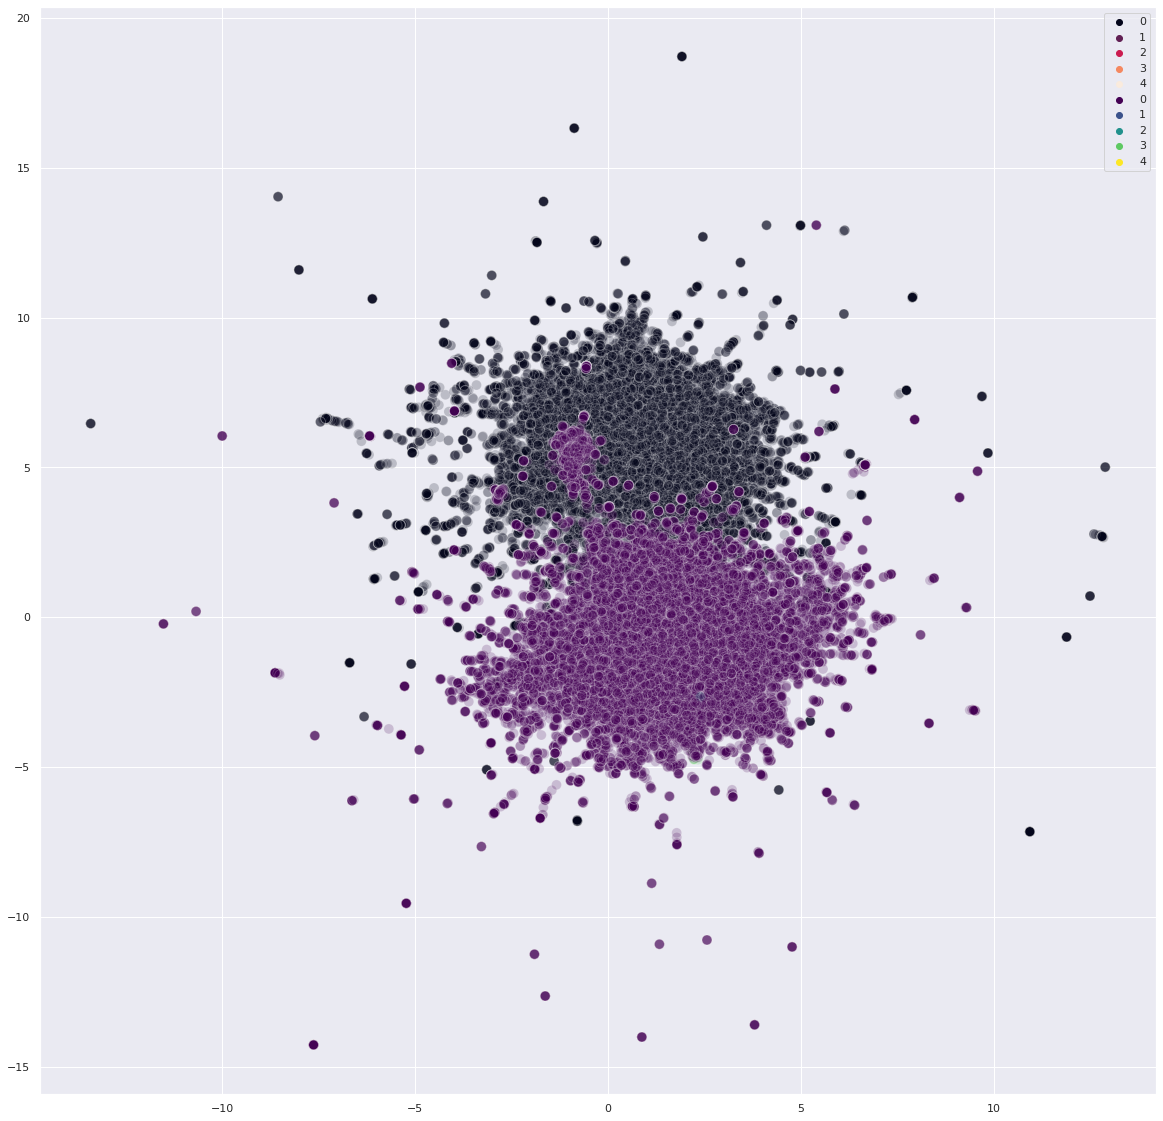

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(20, 20)})
sns.scatterplot(x=sw[:, 0], y=sw[:, 1], s=100, alpha=.2, hue=hc_sw, palette="rocket")
sns.scatterplot(x=ru[:, 0], y=ru[:, 1], s=100, alpha=.2, hue=hc_ru, palette="viridis")

In [ ]:
embeddings_sw = []
tags_sw = []

for line, tag in tqdm(zip(df['swedish_sentence'], df['swedish_verbs']),
                      total=df.shape[0]):
        try: 
            embedding = model.encode(line)
            embeddings_sw.append(embedding)
            tags_sw.append(tag)
        except Exception as e:
            print(line)
            print(e)

In [ ]:
embeddings_ru = []
tags_ru = []

for line, tag in tqdm(zip(df['sentence'], df['lemma_verb']), total=df.shape[0]):
        try: 
            embedding = model.encode(line)
            embeddings_ru.append(embedding)
            tags_ru.append(tag)
        except Exception as e:
            print(line)
            print(e)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9)
kmeans.fit(embeddings_ru)
labels_ru = kmeans.labels_

In [ ]:
kmeans = KMeans(n_clusters=9)
kmeans.fit(embeddings_sw)
labels_sw = kmeans.labels_

In [ ]:
adjusted_rand_score(labels_sw, labels_ru)

0.3340385770774017

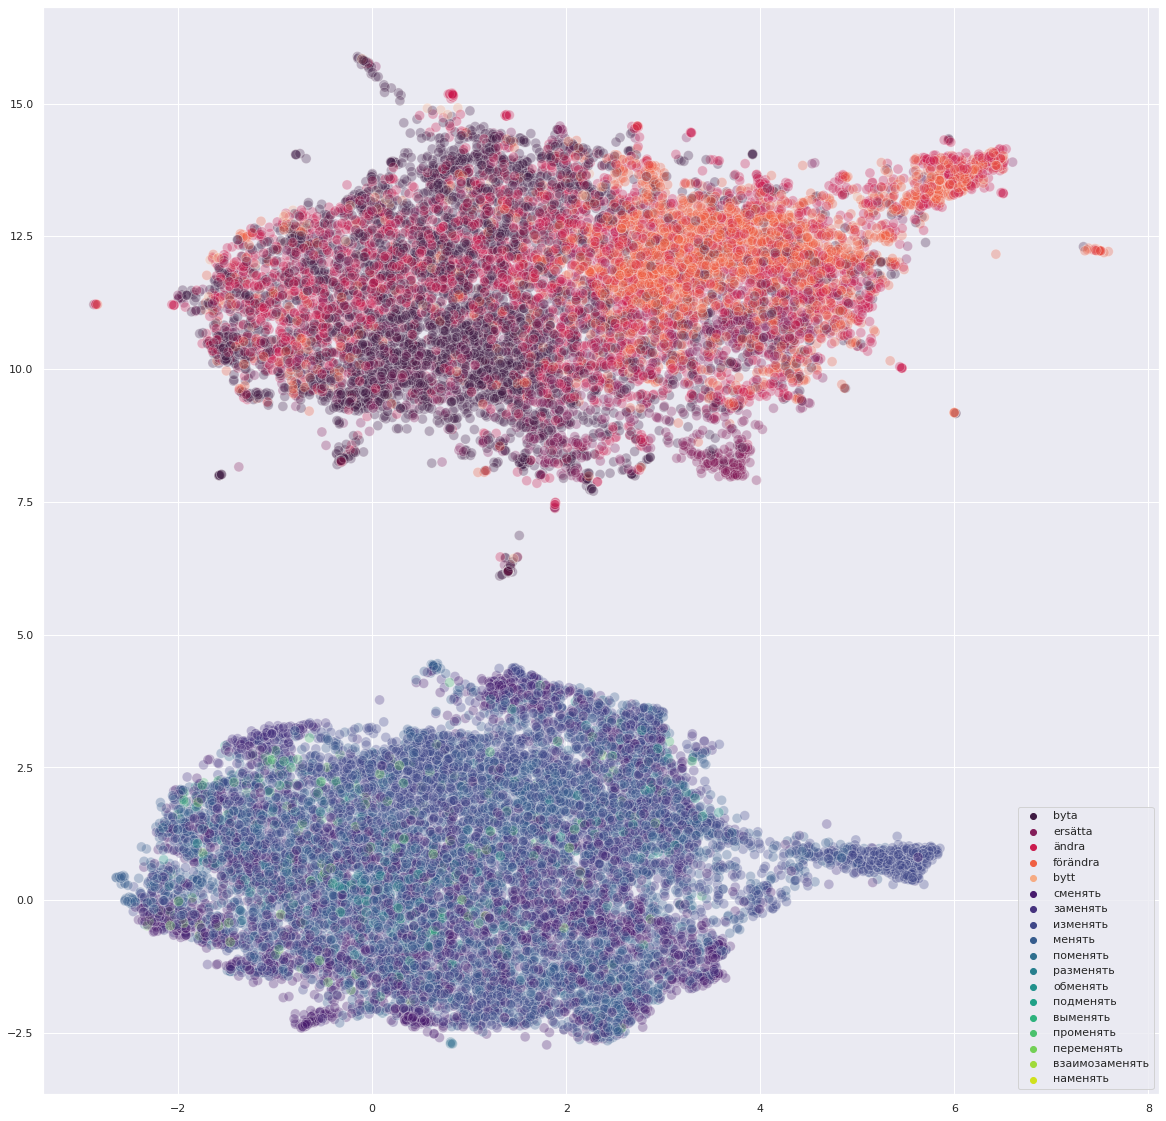

In [ ]:
sns.set(rc={'figure.figsize':(20, 20)})
sns.scatterplot(x=sw[:, 0], y=sw[:, 1], s=100, alpha=.3, hue=tags_sw, palette="rocket")
sns.scatterplot(x=ru[:, 0], y=ru[:, 1], s=100, alpha=.3, hue=tags_ru, palette="viridis")

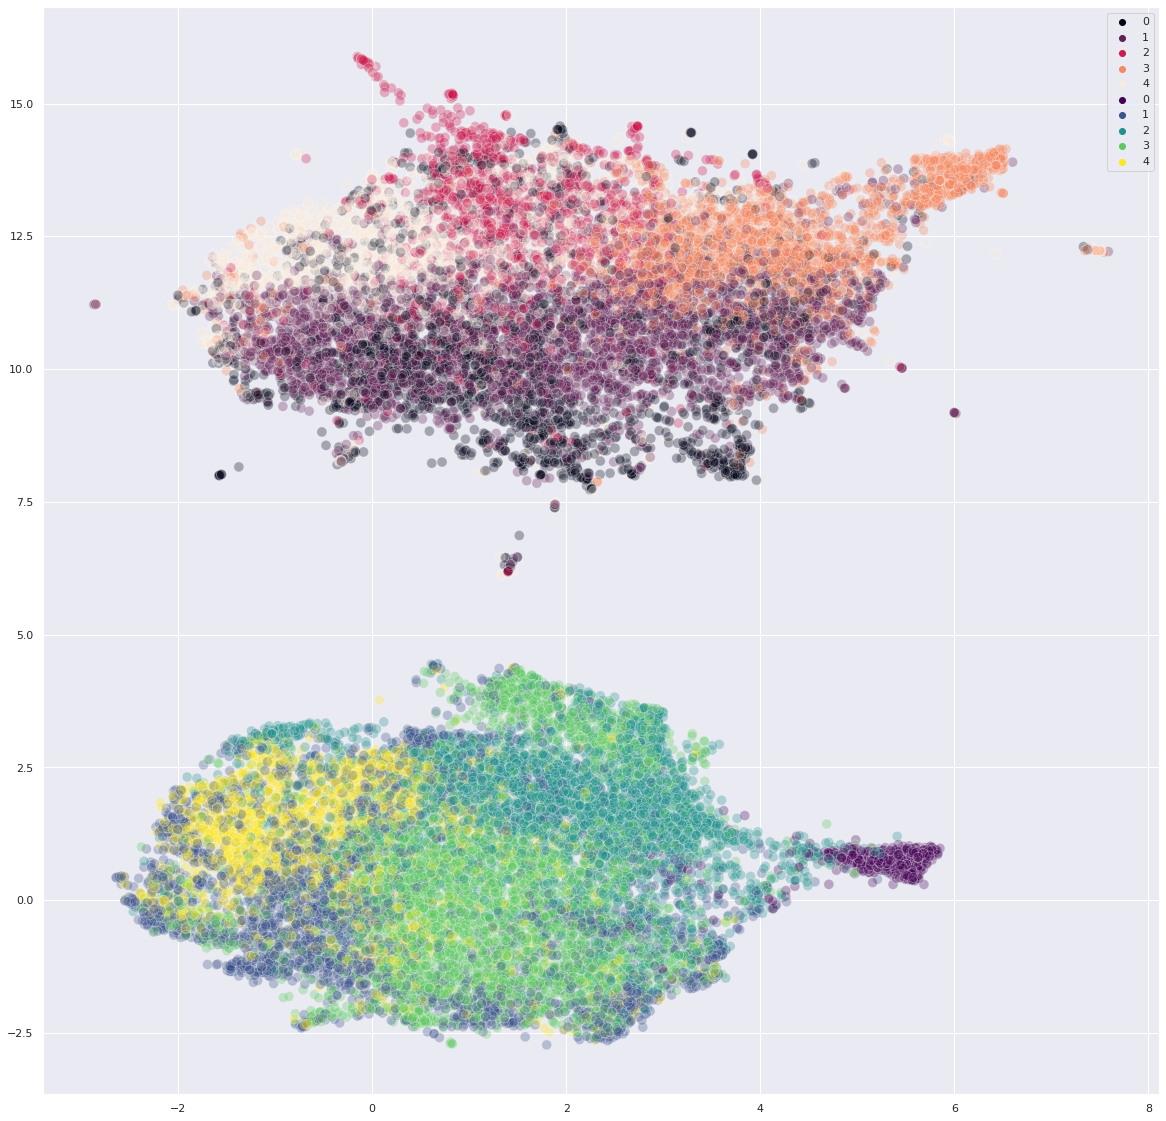

In [ ]:
sns.set(rc={'figure.figsize':(20, 20)})
sns.scatterplot(x=sw[:, 0], y=sw[:, 1], s=100, alpha=.3, hue=labels_sw, palette="rocket")
sns.scatterplot(x=ru[:, 0], y=ru[:, 1], s=100, alpha=.3, hue=labels_ru, palette="viridis")

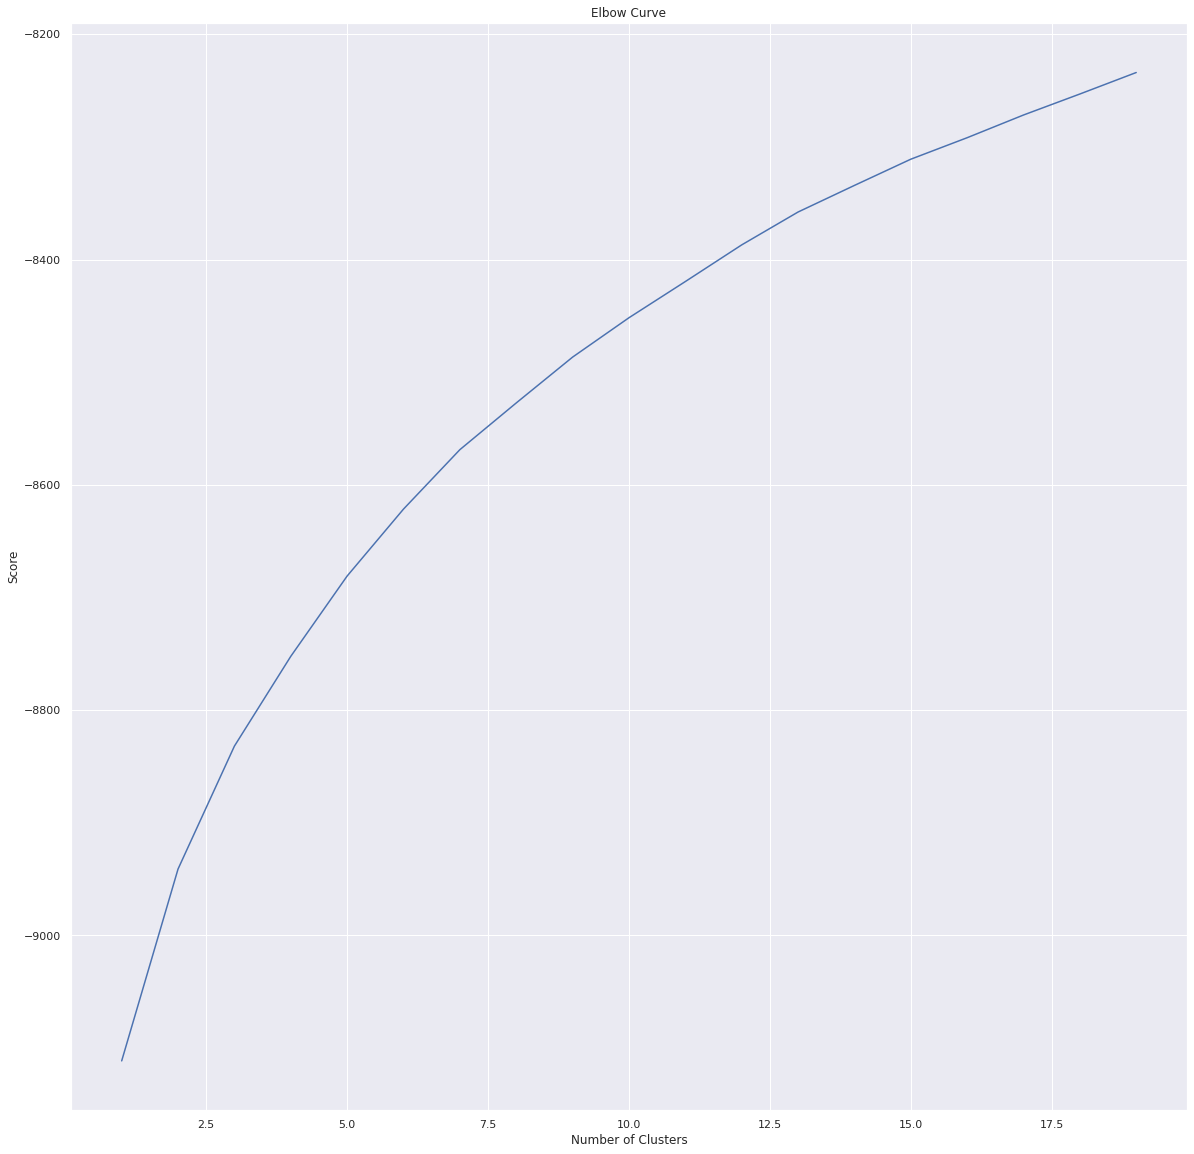

In [ ]:
# https://www.kaggle.com/yugagrawal95/k-means-clustering-using-seaborn-visualization
import matplotlib.pyplot as plt

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(embeddings_ru).score(embeddings_ru) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
dic = {}
for s, cl in zip(df_full['swedish_sentence'].to_list(), hc_sw):
    if cl not in dic :
        dic[cl] = []
    dic[cl].append(s)

In [ ]:
df = pd.read_csv('change_translated.csv')

In [ ]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'cosine', linkage='average')
y_hc=hc.fit_predict(emb_sw)

In [ ]:
dic = {}
for s, cl in zip(df_full['swedish_sentence'].to_list(), y_hc):
    if cl not in dic :
        dic[cl] = []
    dic[cl].append(s)